## Synchrony Datathon 
By Team Init to win It

### Problem Statement

The goal is to complete the following:
* Analyze and identify attribute associations to customer call reasons within the IVR system with an emphasis on calls that the IVR did not resolve (i.e, calls transferred to agent).
* Understanding the attributes, their relationship to call reasons, and the IVR’s effectiveness to address the call reason, suggest opportunities to improve overall customer experience and satisfaction. We encourage creative approaches in data analysis, visualization, and predictive modeling to address this challenge.

### Our Methodology
1) Data Pre-Processing
2) EDA (Explatory Data Analysis)
3) Data Visualizations
4) Predictive Modeling
5) Recommendations and Conclusion

In [48]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Add section here where you concatnated both the csv files

In [49]:
df = pd.read_csv('datamerged.csv')

In [50]:
df.shape

(1798798, 24)

In [51]:
df.describe()

,serial,no_of_accounts_with_syf_13_march,account_balance_13_march,eservice_ind_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,eservice_ind_18_march,auto_pay_enrolled_status_18_march
count,1.798798e+06,1.795398e+06,1.685016e+06,1.798798e+06,1.798798e+06,1.795396e+06,1.696969e+06,1.798798e+06,1.798798e+06
mean,1.497679e+10,4.938873e+00,1.317626e+03,3.295673e-01,2.248835e-02,4.948396e+00,1.317619e+03,3.339997e-01,2.272240e-02
std,5.000029e+09,3.623405e+00,1.972779e+03,4.700562e-01,1.482654e-01,3.627627e+00,1.979695e+03,4.716397e-01,1.490171e-01
min,1.000100e+10,1.000000e+00,-2.559600e+04,0.000000e+00,0.000000e+00,1.000000e+00,-2.559600e+04,0.000000e+00,0.000000e+00
25%,1.000400e+10,2.000000e+00,1.149700e+02,0.000000e+00,0.000000e+00,2.000000e+00,1.144800e+02,0.000000e+00,0.000000e+00
50%,1.003100e+10,4.000000e+00,5.715850e+02,0.000000e+00,0.000000e+00,4.000000e+00,5.686500e+02,0.000000e+00,0.000000e+00
75%,2.000307e+10,7.000000e+00,1.716582e+03,1.000000e+00,0.000000e+00,7.000000e+00,1.715620e+03,1.000000e+00,0.000000e+00
max,2.005400e+10,1.210000e+02,5.864171e+04,1.000000e+00,1.000000e+00,1.210000e+02,6.983241e+04,1.000000e+00,1.000000e+00


In [52]:
df.columns

Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march'],
      dtype='object')

### Section 1: Pre-Processing

Step 1: We will converting all retailer_codes to uppercase format since 1 csv file has all codes in uppercase and the other csv file has it in lowercase. This is likely an error in the dataset

In [53]:
df['retailer_code'] = df['retailer_code'].str.upper()

Step 2: There are a lot of mos values which mean the same thing, but are represented with different codes. They are:
1.   DP                               Disputes
2.   DS                               Disputes
3.    
4.    PR                                Privacy
5.    PV                                Privacy
6.    
7.    RV                               Recovery
8.    CC                               Recovery
9.    
10.   Ls                     Report lost stolen
11.   LS                     Report lost stolen
12.   
13.  MR                    SMS Account Summary
14.  TA                    SMS Account Summary
15.  TS                    SMS Account Summary
16.  
17.  Tf                    SMS Flip Activation
18.  TF                    SMS Flip Activation
19.  
20.  TR                               Transfer
21.  ss                               Transfer
22.  
23.   ER                  eService Registration
24.   eR                  eService Registration

In [54]:
code_mapping = {
    'DS': 'DP', 'PV': 'PR', 'CC': 'RV', 'Ls': 'LS',
    'TA': 'TS', 'MR': 'TS', 'Tf': 'TF', 'ss': 'TR', 'eR': 'ER'
}

def normalize_codes(mos_string):
    codes = mos_string.split()
    normalized_codes = [code_mapping.get(code, code) for code in codes]
    return ' '.join(normalized_codes)

df['mos'] = df['mos'].apply(normalize_codes)

Checking for any missing values

In [55]:
null_counts = df.isnull().sum()
print("Null/Empty counts for each column:")
print(null_counts)

Null/Empty counts for each column:
timestamp_call_key                         0
retailer_code                              0
serial                                     0
reason                                     0
mos                                        0
resolved                                   0
no_of_accounts_with_syf_13_march        3400
account_balance_13_march              113782
delinquency_history_13_march               0
account_open_date_13_march                 0
account_status_13_march              1732768
card_activation_status_13_march            0
eservice_ind_13_march                      0
ebill_enrolled_status_13_march          4936
auto_pay_enrolled_status_13_march          0
no_of_accounts_with_syf_18_march        3402
account_balance_18_march              101829
delinquency_history_18_march               0
account_open_date_18_march                 0
account_status_18_march              1703450
card_activation_status_18_march            0
eservice_ind_18_marc

Step 3: We wanted to check if any additional mapping can be done for the other columns namely 'ebill_enrolled_status_13_march' 'card_activation_status_13_march','account_status_13_march and the same for the 18th march


In [56]:
#making the mappings 
df['ebill_enrolled_status_13_march'] = df['ebill_enrolled_status_13_march'].fillna('N').replace({' ': 'N', 'D': 'B', 'L': 'B'})
df['ebill_enrolled_status_18_march'] = df['ebill_enrolled_status_18_march'].fillna('N').replace({' ': 'N', 'D': 'B', 'L': 'B'})
df['card_activation_status_13_march'] = df['card_activation_status_13_march'].fillna('1').replace({' ': '1'})
df['card_activation_status_18_march'] = df['card_activation_status_18_march'].fillna('1').replace({' ': '1'})
df['account_status_13_march'] = df['account_status_13_march'].fillna('N').replace({'E': 'C', 'F': 'C', 'I': 'C', 'Z': 'C'})
df['account_status_18_march'] = df['account_status_18_march'].fillna('N').replace({'E': 'C', 'F': 'C', 'I': 'C', 'Z': 'C'})

Step 4: Creating two columns, date of the call and the time of the call based on the timestamp key column

In [57]:
def parse_datetime(s):
    datetime_part = s.split()[0]
    date_part = datetime_part[:6]
    time_part = datetime_part[6:]
    date_parsed = datetime.strptime(date_part, '%y%m%d').date()
    time_parsed = datetime.strptime(time_part, '%H%M%S').time()
    date_str = date_parsed.strftime('%m/%d/%Y')
    return date_str, time_parsed

df['date_of_call'], df['time_of_call'] = zip(*df['timestamp_call_key'].apply(parse_datetime))

Checking for missing values

In [58]:
null_counts = df.isnull().sum()
print("Null/Empty counts for each column:")
print(null_counts)

Null/Empty counts for each column:
timestamp_call_key                        0
retailer_code                             0
serial                                    0
reason                                    0
mos                                       0
resolved                                  0
no_of_accounts_with_syf_13_march       3400
account_balance_13_march             113782
delinquency_history_13_march              0
account_open_date_13_march                0
account_status_13_march                   0
card_activation_status_13_march           0
eservice_ind_13_march                     0
ebill_enrolled_status_13_march            0
auto_pay_enrolled_status_13_march         0
no_of_accounts_with_syf_18_march       3402
account_balance_18_march             101829
delinquency_history_18_march              0
account_open_date_18_march                0
account_status_18_march                   0
card_activation_status_18_march           0
eservice_ind_18_march                    

Step 5: There are instances where we noticed that it has been shown to have a resolution of floor but then TR is not given in mos since the data has been cut off for a particular limit as mentioned by the mentors

In [59]:
count_before = df[(df['resolved'] == 'floor') & (~df['mos'].str.endswith('TR'))].shape[0]
mask = (df['resolved'] == 'floor') & (~df['mos'].str.endswith('TR'))
df.loc[mask, 'mos'] = df.loc[mask, 'mos'] + ' TR'
count_after = df[(df['resolved'] == 'floor') & (~df['mos'].str.endswith('TR'))].shape[0]

print("Number of rows where resolved = 'floor' and mos does not end with 'TR' before updating:", count_before)
print("Number of rows where resolved = 'floor' and mos does not end with 'TR' after updating:", count_after)

Number of rows where resolved = 'floor' and mos does not end with 'TR' before updating: 16140
Number of rows where resolved = 'floor' and mos does not end with 'TR' after updating: 0


### Section 2: EDA

### Section 2.1: Reasons and floor percentage 

Here, we look into the reasons where the floor percentage is high but weighted based on the number of occurences of the reason as well

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame with 'reason' and 'resolved' columns

# Create a contingency table
contingency_table = pd.crosstab(df['reason'], df['resolved'])

# Perform the chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-squared:", chi2)
print("P-value:", p)


Chi-squared: 511699.3808419985
P-value: 0.0


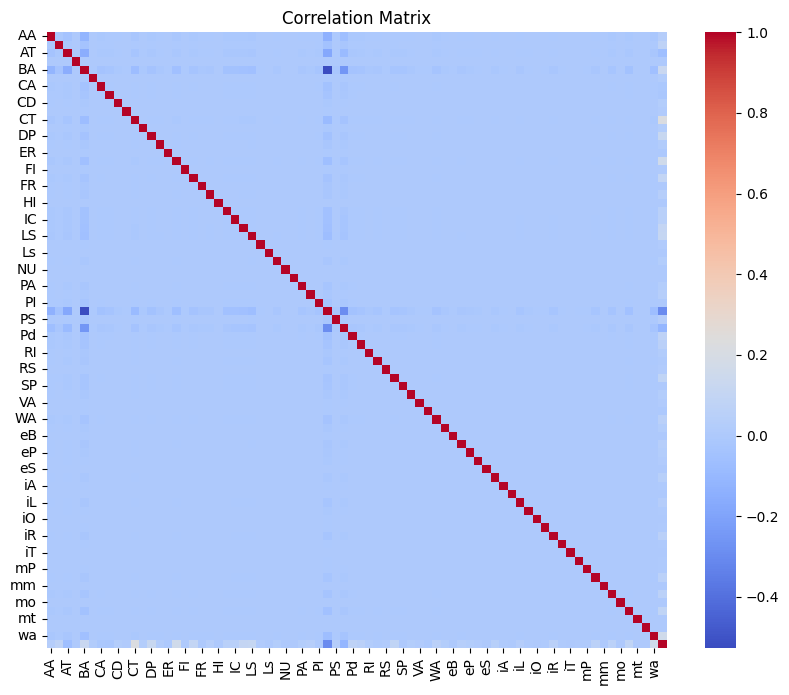

In [36]:

# Create dummy variables for each unique reason
reason_dummies = pd.get_dummies(df['reason'])

# Convert 'resolved' column to binary (0 and 1)
df['resolved_binary'] = df['resolved'].map({'resolved': 0, 'floor': 1})

# Concatenate reason dummies with the binary 'resolved' column
data_combined = pd.concat([reason_dummies, df['resolved_binary']], axis=1)

# Compute the correlation matrix
correlation_matrix = data_combined.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [38]:
# Create a set of unique reasons
unique_reasons = set(df['reason'])

# Dictionary to store floor percentages and total occurrences for each reason
reason_statistics = {}

# Calculate floor percentages and total occurrences for each reason
for reason in unique_reasons:
    reason_df = df[df['reason'] == reason]
    total_cases = len(reason_df)
    floor_count = (reason_df['resolved'] == 'floor').sum()
    floor_percentage = (floor_count / total_cases) * 100
    weighted_percentage = (floor_count / total_cases) * 100 * (total_cases / len(df))
    reason_statistics[reason] = {'Floor Percentage': floor_percentage, 'Weighted Percentage': weighted_percentage, 'Total Cases': total_cases}
    
# Sort weighted percentages from highest to lowest
sorted_reason_statistics = sorted(reason_statistics.items(), key=lambda x: x[1]['Weighted Percentage'], reverse=True)

# Print sorted weighted percentages along with the total occurrences
for reason, stats in sorted_reason_statistics:
    print(f"Reason: {reason}, Weighted Percentage: {stats['Weighted Percentage']:.2f}%, Floor Percentage: {stats['Floor Percentage']:.2f}%, Total Cases: {stats['Total Cases']}")


Reason: BA, Weighted Percentage: 8.81%, Floor Percentage: 27.97%, Total Cases: 566351
Reason: PP, Weighted Percentage: 1.87%, Floor Percentage: 4.95%, Total Cases: 678314
Reason: CT, Weighted Percentage: 1.28%, Floor Percentage: 97.00%, Total Cases: 23796
Reason: PT, Weighted Percentage: 1.02%, Floor Percentage: 8.26%, Total Cases: 221583
Reason: AA, Weighted Percentage: 0.84%, Floor Percentage: 27.50%, Total Cases: 54861
Reason: wa, Weighted Percentage: 0.74%, Floor Percentage: 92.67%, Total Cases: 14296
Reason: FD, Weighted Percentage: 0.69%, Floor Percentage: 95.90%, Total Cases: 13007
Reason: LS, Weighted Percentage: 0.53%, Floor Percentage: 68.88%, Total Cases: 13765
Reason: AT, Weighted Percentage: 0.48%, Floor Percentage: 9.50%, Total Cases: 91404
Reason: LC, Weighted Percentage: 0.42%, Floor Percentage: 75.25%, Total Cases: 10076
Reason: DP, Weighted Percentage: 0.38%, Floor Percentage: 98.53%, Total Cases: 6930
Reason: mp, Weighted Percentage: 0.30%, Floor Percentage: 71.26%, 

Here, Since we know about BA and PP already, we will ignore those two, instead lets look at the following intresting ones with high floor percentages with a cut off of 0.5% atleast in weighted percentage: CT, FD, wa, LC, LS

### Section 2.2: Looking into Serial Callers

Here, in this section, we want to see if there are cases where a customer has called back multiple times. This can be done by cross checking with the serial column which has the account number. 

Serial callers are looked at on a daily basis. Thus, for the purposes of this project, we set the threshold that if a caller has called more than 4 times in one day, they will be classified as a serial caller. Here, we will do a day by day analysis overlooking March 13th since March 13th considers the time only from 11pm to 11:59pm whereas the rest of the days cover 24 hour data


In [46]:
df['timestamp'] = pd.to_datetime(df['date_of_call'] + ' ' + df['time_of_call'].astype(str))
min_max_times = df.groupby('date_of_call')['timestamp'].agg(['min', 'max'])
print(min_max_times)

                             min                 max
date_of_call                                        
03/13/2024   2024-03-13 23:55:39 2024-03-13 23:59:59
03/14/2024   2024-03-14 00:00:01 2024-03-14 23:59:59
03/15/2024   2024-03-15 00:00:00 2024-03-15 23:59:59
03/16/2024   2024-03-16 00:00:00 2024-03-16 23:59:59
03/17/2024   2024-03-17 00:00:00 2024-03-17 23:59:16


In [47]:
#Splitting the datafram based on the date
march_14_data = df[df['date_of_call'] == '03/14/2024']
print(len(march_14_data))
march_15_data = df[df['date_of_call'] == '03/15/2024']
print(len(march_15_data))
march_16_data = df[df['date_of_call'] == '03/16/2024']
print(len(march_16_data))
march_17_data = df[df['date_of_call'] == '03/17/2024']
print(len(march_17_data))

530100
579683
384879
303933


In [62]:
# Count the occurrences of each count
# Count occurrences of each serial
serial_counts = march_14_data['serial'].value_counts()
serialcaller = serial_counts[serial_counts > 1]
occurrence_counts_14 = serialcaller.value_counts().sort_index()
print("14 march")
print(occurrence_counts_14)

serial_counts = march_15_data['serial'].value_counts()
serialcaller = serial_counts[serial_counts > 1]
occurrence_counts_15 = serialcaller.value_counts().sort_index()
print("15 march")
print(occurrence_counts_15)

serial_counts = march_16_data['serial'].value_counts()
serialcaller = serial_counts[serial_counts > 1]
occurrence_counts_16 = serialcaller.value_counts().sort_index()
print("16 march")
print(occurrence_counts_16)

serial_counts = march_17_data['serial'].value_counts()
serialcaller = serial_counts[serial_counts > 1]
occurrence_counts_17 = serialcaller.value_counts().sort_index()
print("17 march")
print(occurrence_counts_17)

14 march
count
2     40674
3      5607
4      1131
5       284
6        78
7        35
8        18
9        13
10        2
11        1
12        2
24        1
Name: count, dtype: int64
15 march
count
2     44557
3      6236
4      1249
5       286
6        98
7        25
8        14
9         6
10        3
11        3
12        2
14        1
17        1
19        1
20        1
Name: count, dtype: int64
16 march
count
2     28761
3      3984
4       787
5       197
6        56
7        25
8         8
9         3
10        3
12        1
13        1
14        1
Name: count, dtype: int64
17 march
count
2     22253
3      2897
4       557
5       148
6        54
7        11
8         9
9         4
10        1
11        1
13        1
14        1
16        2
Name: count, dtype: int64


Here, we will now set the threshold as the serial_counts as more than 4 and then, assign a new column called serial_caller which has either 0 or 1 based on the number of occurences of the serial number

In [63]:
# Count the occurrences of each serial number for each day
serial_counts_14 = march_14_data['serial'].value_counts()
serial_counts_15 = march_15_data['serial'].value_counts()
serial_counts_16 = march_16_data['serial'].value_counts()
serial_counts_17 = march_17_data['serial'].value_counts()

# Assign a new column 'serial_caller' based on the 4
march_14_data['serial_caller'] = march_14_data['serial'].map(lambda x: 1 if serial_counts_14.get(x, 0) > 4 else 0)
march_15_data['serial_caller'] = march_15_data['serial'].map(lambda x: 1 if serial_counts_15.get(x, 0) > 4 else 0)
march_16_data['serial_caller'] = march_16_data['serial'].map(lambda x: 1 if serial_counts_16.get(x, 0) > 4 else 0)
march_17_data['serial_caller'] = march_17_data['serial'].map(lambda x: 1 if serial_counts_17.get(x, 0) > 4 else 0)

# Print the results
print("March 14th:")
print(march_14_data['serial_caller'].value_counts())

print("March 15th:")
print(march_15_data['serial_caller'].value_counts())

print("March 16th:")
print(march_16_data['serial_caller'].value_counts())

print("March 17th:")
print(march_17_data['serial_caller'].value_counts())

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2353025293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_14_data['serial_caller'] = march_14_data['serial'].map(lambda x: 1 if serial_counts_14.get(x, 0) > 4 else 0)
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2353025293.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_15_data['serial_caller'] = march_15_data['serial'].map(lambda x: 1 if serial_counts_15.get(x, 0) > 4 else 0)
/var/folders/g9/5jyvjr4j7l

March 14th:
serial_caller
0    527627
1      2473
Name: count, dtype: int64
March 15th:
serial_caller
0    577167
1      2516
Name: count, dtype: int64
March 16th:
serial_caller
0    383223
1      1656
Name: count, dtype: int64
March 17th:
serial_caller
0    302604
1      1329
Name: count, dtype: int64


/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2353025293.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_17_data['serial_caller'] = march_17_data['serial'].map(lambda x: 1 if serial_counts_17.get(x, 0) > 4 else 0)


There are more number of calls on 14th and 15th march (Which is Thrusday and Friday). Completely unrelated fact but this was also the same day that the annual report dropped on 15th which was the synchrony financial report. Intresting fact!

In [64]:
def calculate_serial_caller_percentage(df):
    total_cases = len(df)
    serial_caller_cases = df[df['serial_caller'] == 1]
    serial_caller_count = len(serial_caller_cases)
    percentage_serial_callers = (serial_caller_count / total_cases) * 100
    print(percentage_serial_callers)


calculate_serial_caller_percentage(march_14_data)
calculate_serial_caller_percentage(march_15_data)
calculate_serial_caller_percentage(march_16_data)
calculate_serial_caller_percentage(march_17_data)

0.46651575174495374
0.43403032346989645
0.430265096302994
0.4372674240704366


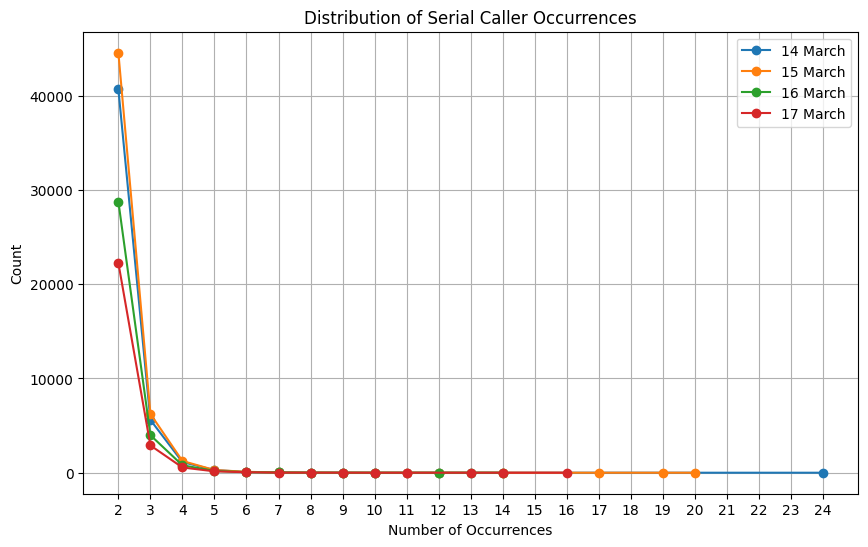

In [65]:
days = ['14 March', '15 March', '16 March', '17 March']
occurrences = [occurrence_counts_14, occurrence_counts_15, occurrence_counts_16, occurrence_counts_17]

plt.figure(figsize=(10, 6))
for day, counts in zip(days, occurrences):
    plt.plot(counts.index, counts.values, marker='o', linestyle='-', label=day)

plt.title('Distribution of Serial Caller Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(range(2, max(occurrence_counts_14.index.max(), 
                        occurrence_counts_15.index.max(), 
                        occurrence_counts_16.index.max(), 
                        occurrence_counts_17.index.max()) + 1))
plt.show()

### Section 2.3: Looking into Delinquency

In [67]:
#counts of the delinquency_history for data wrt 13th March
df['delinquency_history_13_march'].value_counts()

delinquency_history_13_march
[00]    1660525
[20]      63358
[02]      54237
[22]       6014
[32]       4585
[03]       3590
[43]       1481
[54]        743
[88]        674
[04]        673
[23]        576
[65]        386
[76]        376
[08]        260
[33]        257
[05]        201
[44]        149
[06]        124
[55]         80
[07]         80
[34]         61
[87]         54
[24]         48
[77]         36
[66]         35
[45]         30
[56]         26
[67]         23
[46]         17
[35]         16
[25]         14
[47]         11
[26]         10
[36]         10
[78]          9
[30]          6
[68]          5
[27]          4
[57]          4
[48]          3
[37]          3
[58]          1
[40]          1
[53]          1
[42]          1
Name: count, dtype: int64

In [68]:
#counts of the delinquency_history for data wrt 18th March
df['delinquency_history_18_march'].value_counts()

delinquency_history_18_march
[00]    1659023
[20]      63311
[02]      56348
[22]       6032
[03]       3872
[32]       3839
[43]       1433
[04]        736
[54]        706
[88]        693
[23]        558
[65]        344
[76]        320
[08]        283
[05]        242
[33]        200
[06]        149
[44]        142
[07]         85
[55]         74
[24]         53
[34]         46
[87]         46
[56]         31
[66]         31
[45]         31
[77]         29
[67]         22
[25]         18
[46]         14
[78]         13
[35]         10
[47]         10
[48]          8
[30]          7
[57]          6
[68]          6
[27]          4
[58]          4
[26]          4
[38]          4
[37]          4
[36]          3
[40]          1
[53]          1
[80]          1
[42]          1
Name: count, dtype: int64

In [69]:
# Split the DataFrame into two parts
df_n1 = df.iloc[:, 3:15]  # Data wrt 13th March
df_n2 = pd.concat([df.iloc[:, 4:7], df.iloc[:, 17:]], axis=1)  #Data wrt 18th March

In [70]:
#13 March

#xcluding bad data wrt 13th March
exclude_values = ['[20]', '[24]', '[25]', '[46]', '[35]', '[47]', '[48]', '[57]', '[68]', '[27]', '[58]', '[26]', '[37]', '[36]', '[53]', '[42]', '[30]', '[40]']


# Filter out rows with specified values in the "delinquency_history_13_march_changed" column
df_filter1 = df_n1[~df_n1['delinquency_history_13_march'].isin(exclude_values)]

#Removing the sqaure brackets so that it can be further split into individual byte wrt 13th March

df_filter1['delinquency_history_13_march_changed'] = df_filter1['delinquency_history_13_march'].str.replace('[', '').str.replace(']', '')
df_filter1.head()

# Convert numeric column to string type 
df_filter1['delinquency_history_13_march_changed'] = df_filter1['delinquency_history_13_march_changed'].astype(str)

# Split numeric data into two parts
df_filter1['current'] = df_filter1['delinquency_history_13_march_changed'].str[:-1]
df_filter1['previous'] = df_filter1['delinquency_history_13_march_changed'].str[-1]


/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/156003586.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['delinquency_history_13_march_changed'] = df_filter1['delinquency_history_13_march'].str.replace('[', '').str.replace(']', '')
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/156003586.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['delinquency_history_13_march_changed'] = df_filter1['delinquency_history_13_march_changed'].astype(str)
/v

In [71]:
#18 March

#Removing the sqaure brackets so that it can be further split into individual byte wrt 18th March

exclude_values = ['[20]', '[24]', '[25]', '[46]', '[35]', '[47]', '[48]', '[57]', '[68]', '[27]', '[58]', '[26]', '[38]', '[37]', '[36]', '[53]', '[42]', '[30]', '[80]']

# Filter out rows with specified values in the "delinquency_history_13_march_changed" column
df_filter2 = df_n2[~df_n2['delinquency_history_18_march'].isin(exclude_values)]

df_filter2['delinquency_history_18_march_changed'] = df_filter2['delinquency_history_18_march'].str.replace('[', '').str.replace(']', '')

# Convert numeric column to string type
df_filter2['delinquency_history_18_march_changed'] = df_filter2['delinquency_history_18_march_changed'].astype(str)

# Split numeric data into two parts
df_filter2['current18th'] = df_filter2['delinquency_history_18_march_changed'].str[:-1]
df_filter2['previous18th'] = df_filter2['delinquency_history_18_march_changed'].str[-1]

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/4220087027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['delinquency_history_18_march_changed'] = df_filter2['delinquency_history_18_march'].str.replace('[', '').str.replace(']', '')
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/4220087027.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['delinquency_history_18_march_changed'] = df_filter2['delinquency_history_18_march_changed'].astype(str)


In [72]:
df_filter1['current'] = df_filter1['current'].astype(int)

#Grouping data to check the resolved and floor values in the current month wrt 13th March

grouped_data = df_filter1.groupby('resolved')['current'].sum() 
print(grouped_data)

#Grouping data to check the resolved and floor values in the previous month wrt 13th March

df_filter1['previous'] = df_filter1['previous'].astype(int) 


grouped_data1 = df_filter1.groupby('resolved')['previous'].sum()
print(grouped_data1)

#Grouping data to check the resolved and floor values in the previous month wrt 18th March

df_filter2['previous18th'] = df_filter2['previous18th'].astype(int) 


grouped_data1 = df_filter2.groupby('resolved')['previous18th'].sum()
print(grouped_data1)

#Grouping data to check the resolved and floor values in the current month wrt 18th March

df_filter2['current18th'] = df_filter2['current18th'].astype(int)


grouped_data2 = df_filter2.groupby('resolved')['current18th'].sum()
print(grouped_data2)

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2106866124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['current'] = df_filter1['current'].astype(int)
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2106866124.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['previous'] = df_filter1['previous'].astype(int)


resolved
floor       25273
resolved    24936
Name: current, dtype: int64
resolved
floor        47110
resolved    122524
Name: previous, dtype: int64
resolved
floor        47837
resolved    125137
Name: previous18th, dtype: int64
resolved
floor       23850
resolved    22896
Name: current18th, dtype: int64


/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2106866124.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['previous18th'] = df_filter2['previous18th'].astype(int)
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2106866124.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['current18th'] = df_filter2['current18th'].astype(int)


The significant difference in the count of floor and resolved, leads to further explore the data

In [73]:
# Convert string values to numeric binary values
df_filter1['resolved_new'] = df_filter1['resolved'].map({'resolved': 1, 'floor': 0})
df_filter2['resolved_new'] = df_filter2['resolved'].map({'resolved': 1, 'floor': 0})

from scipy.stats import mannwhitneyu
# Separate data into two groups based on the binary column
group_0 = df_filter1[df_filter1['resolved_new'] == 0]['previous']
group_1 = df_filter1[df_filter1['resolved_new'] == 1]['previous']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_0, group_1)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2496600930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['resolved_new'] = df_filter1['resolved'].map({'resolved': 1, 'floor': 0})
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/2496600930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['resolved_new'] = df_filter2['resolved'].map({'resolved': 1, 'floor': 0})


Mann-Whitney U Test Results:
Test Statistic: 244603045959.0
P-value: 2.435240273723575e-83
Reject the null hypothesis: There is a significant difference between the distributions.


In [74]:
#We further check Cohen's coefficient to understand the magnitude

# Calculate Cohen's d
# Calculate the mean difference between the two groups
mean_diff = np.mean(group_0) - np.mean(group_1)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_0)**2 + np.std(group_1)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: 0.07953835774598869


In [75]:
# Separate data into two groups based on the binary column
group_2 = df_filter1[df_filter1['resolved_new'] == 0]['current']
group_3 = df_filter1[df_filter1['resolved_new'] == 1]['current']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_2, group_3)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

Mann-Whitney U Test Results:
Test Statistic: 245385634095.5
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the distributions.


In [76]:
# Calculate the mean difference between the two groups
mean_diff = np.mean(group_2) - np.mean(group_3)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_2)**2 + np.std(group_3)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: 0.11907803215789889


In [77]:
# Separate data into two groups based on the binary column
group_4 = df_filter2[df_filter2['resolved_new'] == 0]['previous18th']
group_5 = df_filter2[df_filter2['resolved_new'] == 1]['previous18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_4, group_5)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

Mann-Whitney U Test Results:
Test Statistic: 244033698620.5
P-value: 6.4036461709479316e-83
Reject the null hypothesis: There is a significant difference between the distributions.


In [78]:
# Calculate Cohen's d
# Calculate the mean difference between the two groups
mean_diff = np.mean(group_4) - np.mean(group_5)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_4)**2 + np.std(group_5)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: 0.0800440571202082


In [79]:
group_6 = df_filter2[df_filter2['resolved_new'] == 0]['current18th']
group_7 = df_filter2[df_filter2['resolved_new'] == 1]['current18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_6, group_7)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

Mann-Whitney U Test Results:
Test Statistic: 244647637944.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the distributions.


In [80]:
# Calculate the mean difference between the two groups
mean_diff = np.mean(group_6) - np.mean(group_7)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_6)**2 + np.std(group_7)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: 0.1168060306915869


In [82]:
#Checking wrt to Autopay
#Converting to binary

def int_to_binary(x):
    if x == 0:
        return 0
    else:
        return 1

# Apply the function to the integer column and create a new binary column
df_filter1['auto_pay_enrolled_status_13_march_bin'] = df_filter1['auto_pay_enrolled_status_13_march'].apply(lambda x: int_to_binary(x))
df_filter2['auto_pay_enrolled_status_18_march_bin'] = df_filter2['auto_pay_enrolled_status_18_march'].apply(lambda x: int_to_binary(x))

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/1432057053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['auto_pay_enrolled_status_13_march_bin'] = df_filter1['auto_pay_enrolled_status_13_march'].apply(lambda x: int_to_binary(x))
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/1432057053.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['auto_pay_enrolled_status_18_march_bin'] = df_filter2['auto_pay_enrolled_status_18_march'].apply(lambda x: 

In [83]:
#Current month Wrt 13th March
from scipy.stats import mannwhitneyu


group_11 = df_filter1[df_filter1['auto_pay_enrolled_status_13_march_bin'] == 0]['current']
group_12 = df_filter1[df_filter1['auto_pay_enrolled_status_13_march_bin'] == 1]['current']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_11, group_12)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_11) - np.mean(group_12)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_11)**2 + np.std(group_12)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 34125338019.0
P-value: 9.694604739120781e-32
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.06355553379858625


In [84]:
#Previous month Wrt 13th March
# Assuming 'binary_column' is the binary column and 'numeric_column' is the numeric column
# 'df' is the DataFrame containing the columns

# Separate data into two groups based on the binary column
group_13 = df_filter1[df_filter1['auto_pay_enrolled_status_13_march_bin'] == 0]['previous']
group_14 = df_filter1[df_filter1['auto_pay_enrolled_status_13_march_bin'] == 1]['previous']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_13, group_14)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_13) - np.mean(group_14)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_13)**2 + np.std(group_14)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 34692169930.0
P-value: 1.45345512863215e-104
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.12105555644724386


In [85]:
#Previous month Wrt 18th March

# Separate data into two groups based on the binary column
group_15 = df_filter2[df_filter2['auto_pay_enrolled_status_18_march_bin'] == 0]['previous18th']
group_16 = df_filter2[df_filter2['auto_pay_enrolled_status_18_march_bin'] == 1]['previous18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_15, group_16)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_15) - np.mean(group_16)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_15)**2 + np.std(group_16)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 34999462408.0
P-value: 4.509958400887555e-103
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.12077507939640994


In [86]:
#Current month Wrt 18th March
# Separate data into two groups based on the binary column
group_17 = df_filter2[df_filter2['auto_pay_enrolled_status_18_march_bin'] == 0]['current18th']
group_18 = df_filter2[df_filter2['auto_pay_enrolled_status_18_march_bin'] == 1]['current18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_17, group_18)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_17) - np.mean(group_18)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_17)**2 + np.std(group_18)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 34414274812.5
P-value: 2.9659192229682555e-29
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.06091800252960797


In [87]:
#Checking wrt to Eservice
def int_to_binary(x):
    if x == 0:
        return 0
    else:
        return 1

# Apply the function to the integer column and create a new binary column
df_filter1['eservice_ind_13_march_bin'] = df_filter1['eservice_ind_13_march'].apply(lambda x: int_to_binary(x))
# Apply the function to the integer column and create a new binary column
df_filter2['eservice_ind_18_march_bin'] = df_filter2['eservice_ind_18_march'].apply(lambda x: int_to_binary(x))

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/4108283888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['eservice_ind_13_march_bin'] = df_filter1['eservice_ind_13_march'].apply(lambda x: int_to_binary(x))
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_40647/4108283888.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['eservice_ind_18_march_bin'] = df_filter2['eservice_ind_18_march'].apply(lambda x: int_to_binary(x))


In [88]:
#Previous month Wrt 13th March
group_20 = df_filter1[df_filter1['eservice_ind_13_march_bin'] == 0]['previous']
group_21 = df_filter1[df_filter1['eservice_ind_13_march_bin'] == 1]['previous']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_20, group_21)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_20) - np.mean(group_21)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_20)**2 + np.std(group_21)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 330978973517.0
P-value: 4.2517744685674907e-17
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: -0.007665403493109948


In [89]:
#Current month Wrt 13th March

# Separate data into two groups based on the binary column
group_22 = df_filter1[df_filter1['eservice_ind_13_march_bin'] == 0]['current']
group_23 = df_filter1[df_filter1['eservice_ind_13_march_bin'] == 1]['current']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_22, group_23)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_22) - np.mean(group_23)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_22)**2 + np.std(group_23)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 332299929015.0
P-value: 1.2772425228034071e-15
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.014359116569013971


In [90]:
#Previous month Wrt 18th March

# Separate data into two groups based on the binary column
group_23 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 0]['previous18th']
group_24 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 1]['previous18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_23, group_24)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

# Calculate the mean difference between the two groups
mean_diff = np.mean(group_23) - np.mean(group_24)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_23)**2 + np.std(group_24)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 332940719067.5
P-value: 3.860372951332362e-27
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: -0.010517761539241527


In [91]:
#Current month Wrt 18th March
# Separate data into two groups based on the binary column
group_25 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 0]['current18th']
group_26 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 1]['current18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_25, group_26)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_25) - np.mean(group_26)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_25)**2 + np.std(group_26)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 334525582202.0
P-value: 1.1876092765564014e-15
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.014804146777795294


In [92]:
#Current month Wrt 18th March
# Separate data into two groups based on the binary column
group_23 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 0]['previous18th']
group_24 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 1]['previous18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_23, group_24)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")
    
mean_diff = np.mean(group_23) - np.mean(group_24)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_23)**2 + np.std(group_24)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 332940719067.5
P-value: 3.860372951332362e-27
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: -0.010517761539241527


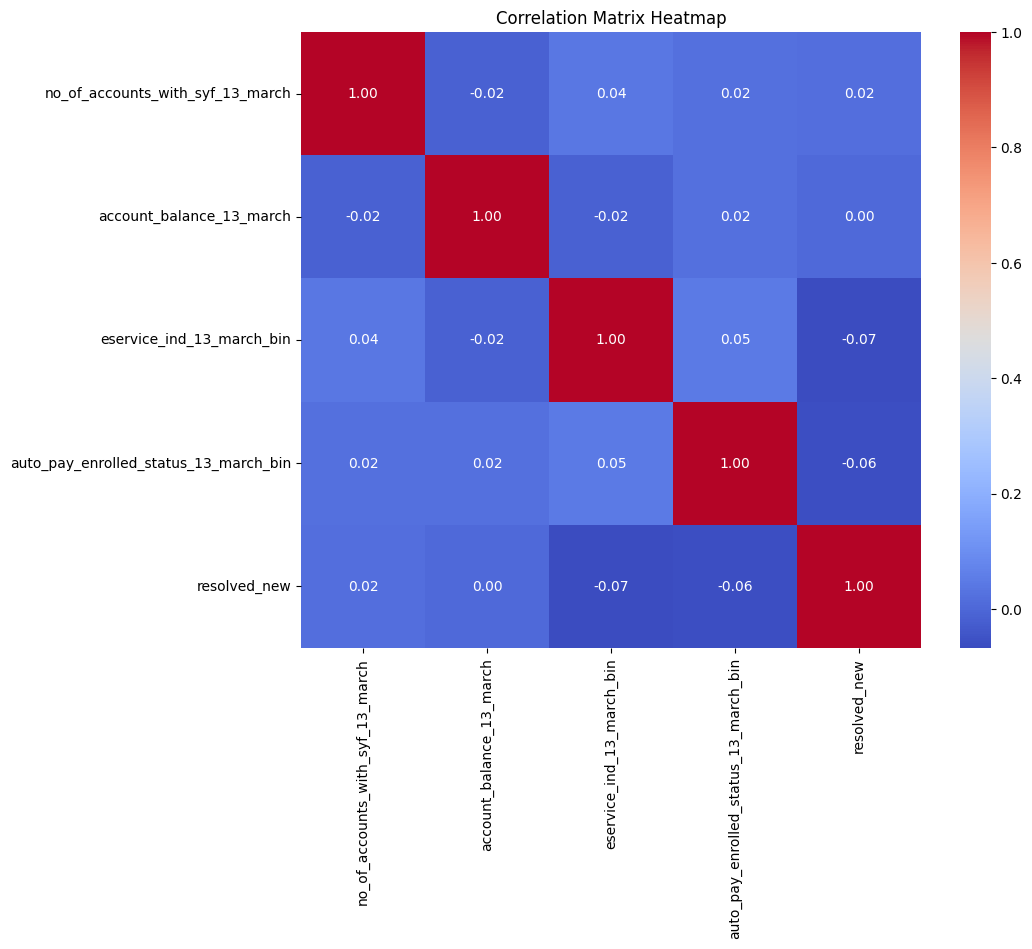

In [93]:
selected_columns = ['no_of_accounts_with_syf_13_march', 'account_balance_13_march',
                    'eservice_ind_13_march_bin','auto_pay_enrolled_status_13_march_bin','resolved_new']

# Compute the correlation matrix
corr_matrix = df_filter1[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Section 2.4: Looking into account balance

In [94]:
filtered_df = df[(df["account_balance_13_march"] > 0) & (df["account_balance_18_march"] < 0)]

resolved_counts = filtered_df["resolved"].value_counts()

# Extract counts for "resolved" and "floor"
count_resolved = resolved_counts.get("resolved", 0)  # Default to 0 if "resolved" is not found
count_floor = resolved_counts.get("floor", 0)  # Default to 0 if "floor" is not found
print(f"Percentage of 'resolved': {count_resolved * 100/ (count_resolved+count_floor)}%")
print(f"Percentage of 'floor': {count_floor * 100/ (count_resolved+count_floor)}%")
print(f"total count: {count_resolved+count_floor}")

# Observation: out of total dataset, floored call is around 20%. but with 13Balance >0 & 18Balance < 0, then floor shoots to 42.5%

Percentage of 'resolved': 57.470010905125406%
Percentage of 'floor': 42.529989094874594%
total count: 1834
